In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader.data as web
import FinanceDataReader as fdr
from sklearn import neighbors,svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import FinanceDataReader as fdr
import mglearn
from sklearn.preprocessing import MinMaxScaler
import sklearn

#성과 평가
from sklearn.metrics import confusion_matrix #오차행렬
from sklearn.metrics import accuracy_score #정확도
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier



In [3]:
#특성 추가 ------------------------------------------
    #이동평균선
def get_MA(df):
    MA_10=df["Close"].rolling(10).mean()
    MA_60=df["Close"].rolling(60).mean()
    df=df.assign(MA_10=MA_10,MA_60=MA_60).dropna()
    
    return df

    
    #스토캐스틱
def get_stochastic(df, n=15, m=5, t=3):
    # n일중 최고가
    ndays_high = df.High.rolling(window=n, min_periods=1).max()
    # n일중 최저가
    ndays_low = df.Low.rolling(window=n, min_periods=1).min()
 
    # Fast%K 계산
    kdj_k = ((df.Close - ndays_low) / (ndays_high - ndays_low))*100
    # Fast%D (=Slow%K) 계산
    kdj_d = kdj_k.ewm(span=m).mean()
    # Slow%D 계산
    kdj_j = kdj_d.ewm(span=t).mean()
 
    # dataframe에 컬럼 추가
    df = df.assign(kdj_k=kdj_k, kdj_d=kdj_d, kdj_j=kdj_j).dropna()
    
    return df
   
    #시간
def get_time(df):
    time=np.linspace(0,10,len(df),endpoint=False).reshape(-1,1)
    df=df.assign(time=time)
    
    return df

In [57]:
# Methods

#train_test_split, score 도출----------------------
def print_score(X,y,model):

    setlen=2000
    X_train,X_test,y_train,y_test=X[:setlen],X[setlen:],y[:setlen],y[setlen:]

    reg=model.fit(X_train,y_train)
    print("훈련 세트 정확도:{:.3f}".format(reg.score(X_train,y_train)))
    print("테스트 세트 정확도:{:.3f}".format(reg.score(X_test,y_test)))

    confusion=confusion_matrix(y_test,reg.predict(X_test))
    print(confusion)

#미래 예측을 위한 시간조정-------------------   

def adjust_time(X,y):
    y=pd.DataFrame(np.array(y),index=KS.index).shift(-1).dropna()
    X=X.loc[y.index]
    return X,y


In [58]:


KS=fdr.DataReader("KS11","2003-01-01","2019-08-14")

#특성 추가---
KS=get_MA(KS)
KS=get_stochastic(KS)
KS=get_time(KS)

X=KS
#--------

# 분위수로 조정한 2중 분류 ---------------
df = pd.DataFrame(index = KS.index, columns = ['Y'])

initial = -1
num = 0
for i in np.linspace(50,100,2):
    df.loc[KS [KS['Change'] >= initial] [KS['Change'] <= round(np.percentile(KS['Change'], i),4)].index] = num
    initial = round(np.percentile(KS['Change'], i),4)
    num += 1
y=df
y=y.astype('int')

X,y=adjust_time(X,y)
print_score(X,y,GradientBoostingClassifier())

print("---------")
# 양수와 음수로 조정한 2중 분류 ---------------

y=np.where(KS["Close"]>KS["MA_60"],1,0)
y=y.astype('int')

X,y=adjust_time(X,y)
print_score(X,y,GradientBoostingClassifier())


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\이승희\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\이승희\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


훈련 세트 정확도:0.767
테스트 세트 정확도:0.486
[[162 924]
 [131 837]]
---------
훈련 세트 정확도:0.975
테스트 세트 정확도:0.744
[[630 341]
 [184 899]]


In [5]:

reg=LogisticRegression().fit(X_train,y_train)
print("훈련 세트 정확도:{:.3f}".format(reg.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(reg.score(X_test,y_test)))

confusion=confusion_matrix(y_test,reg.predict(X_test))
confusion

C:\Users\이승희\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\이승희\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


훈련 세트 정확도:0.500
테스트 세트 정확도:0.498


array([[283,   0],
       [285,   0]], dtype=int64)

In [6]:

reg=GradientBoostingClassifier().fit(X_train,y_train)
print("훈련 세트 정확도:{:.3f}".format(reg.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(reg.score(X_test,y_test)))

confusion=confusion_matrix(y_test,reg.predict(X_test))
confusion

C:\Users\이승희\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


훈련 세트 정확도:0.761
테스트 세트 정확도:0.516


array([[171, 112],
       [163, 122]], dtype=int64)

In [7]:

reg=RandomForestClassifier().fit(X_train,y_train)
print("훈련 세트 정확도:{:.3f}".format(reg.score(X_train,y_train)))
print("테스트 세트 정확도:{:.3f}".format(reg.score(X_test,y_test)))

confusion=confusion_matrix(y_test,reg.predict(X_test))
confusion

C:\Users\이승희\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


훈련 세트 정확도:0.984
테스트 세트 정확도:0.489


array([[244,  39],
       [251,  34]], dtype=int64)

In [8]:
print("이중 분류")
print(classification_report(y_test,reg4,target_names=["하락(0)","상승(1)"]))

이중 분류


NameError: name 'reg4' is not defined

In [ ]:

reg1=neighbors.KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
reg2=svm.SVC(C=1000,gamma=0.01).fit(X_train,y_train)
reg3=RandomForestClassifier(n_estimators=50).fit(X_train,y_train)
reg4=GradientBoostingClassifier(random_state=0).fit(X_train,y_train)

precision,recall,thresholds=precision_recall_curve(y_test,reg4.decision_function(X_test))

In [ ]:

reg1=neighbors.KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
reg2=svm.SVC(C=1000,gamma=0.01).fit(X_train,y_train)
reg3=RandomForestClassifier(n_estimators=50).fit(X_train,y_train)
reg4=GradientBoostingClassifier(random_state=0).fit(X_train,y_train)

precision,recall,thresholds=precision_recall_curve(y_test,reg4.decision_function(X_test))

close_zero=np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,label='0',fillstyle="none",c='k',mew=2)
plt.plot(precision,recall,label="curve")
plt.xlabel("precision")
plt.ylabel('recall')
plt.legend(loc="best")


In [ ]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(4, 4))
fpr_rf,tpr_rf,thresholds_rf=roc_curve(y_test,reg3.predict_proba(X_test)[:,1])

plt.plot(fpr_rf,tpr_rf,'k')
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
plt.plot(fpr_rf[close_default_rf],tpr_rf[close_default_rf],'^',markersize=10,label="RF recall : 0.5",fillstyle="none",mew=2)


In [31]:
X

,Close,Open,High,Low,Volume,Change,MA_10,MA_60,kdj_k,kdj_d,kdj_j,time
Date,,,,,,,,,,,,
2009-03-30,1197.46,1239.80,1244.78,1196.32,527830000.0,-0.0324,1199.557,1144.162667,2.352456,2.352456,2.352456,0.000000
2009-03-31,1206.26,1205.98,1228.21,1203.16,503560000.0,0.0073,1203.795,1144.977000,20.511762,13.248040,9.616178,0.003893
2009-04-01,1233.36,1214.06,1238.04,1201.71,586120000.0,0.0225,1210.136,1145.973500,76.434173,43.178313,28.794541,0.007785
2009-04-02,1276.97,1254.38,1278.56,1249.94,732210000.0,0.0354,1221.652,1147.351667,98.066634,65.978077,48.625760,0.011678
2009-04-03,1283.75,1288.56,1292.60,1274.45,618670000.0,0.0053,1232.933,1148.278000,90.808060,75.509966,62.501480,0.015570
2009-04-06,1297.85,1292.42,1315.30,1292.42,726430000.0,0.0110,1242.768,1149.813833,85.333670,79.099680,70.932312,0.019463
2009-04-07,1300.10,1296.32,1304.28,1282.41,686780000.0,0.0017,1250.608,1151.799500,87.224744,81.976403,76.497838,0.023355
2009-04-08,1262.07,1284.98,1287.59,1260.73,751440000.0,-0.0293,1253.913,1153.554833,55.261388,72.709831,74.596407,0.027248
2009-04-09,1316.35,1274.03,1317.29,1272.02,933680000.0,0.0430,1261.168,1156.032167,99.222948,81.783565,78.197018,0.031141


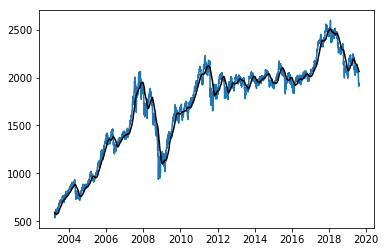

In [59]:
plt.plot(X.index,X["Close"])
plt.plot(X.index,X["MA_60"],'k')

In [46]:
dic

{1: 1, 0: 1}